# Z01.5: Extra Analyses

This notebook contains the extra analyses that supplement the paper for the first Scribal Intent Study (Z01).

## Setup and Utility Functions

In [42]:
# Imports and setup
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, HTML
import os

from qlynx.file_utils import load_pkl
from qlynx.stats_utils import *
from qlynx.display_utils import render_html_to_image
from voynichlib.utils import display_voynichese
from qlynx.file_utils import store_pkl, load_pkl


%reload_ext autoreload
%autoreload 2
 

# Set Global Parameters

In [43]:
do_parametric_studies = True
MAX_BAYES = np.exp(10)
MAX_PROPENSITY = 999
THRESHOLDS = {
    'p_value': 0.01,
    'ln_bayes_factor': 5
}
THRESHOLDS['bayes_factor'] = np.exp(THRESHOLDS['ln_bayes_factor'])
reference_cohort = 'MIDDLE'
smooth = None



## Load the Token Cohort Data

In [44]:
file_path = 'voynich_data/outputs/token_cohort_data.pkl'
token_cohort_data = load_pkl(file_path)

cohorts = token_cohort_data['cohorts']
cohorts_with_randoms = token_cohort_data['cohorts_with_randoms']

corpus_by_c = token_cohort_data['corpus_by_c']
pmfs_by_c = token_cohort_data['pmfs_by_c']
token_ws_by_c = token_cohort_data['token_ws_by_c']

glyph_pmfs_by_c = token_cohort_data['glyph_pmfs_by_c']
glyphs_by_c = token_cohort_data['glyphs_by_c']

## Cross-Analysis for Propensity Tokens

In [45]:
file_path = 'voynich_data/outputs/token_propensity_dfs.pkl'
token_propensity_dfs = load_pkl(file_path)

In [47]:
token_propensity_dfs['TOP']

,glyph_count,N_ref,n_ref,N_x,n_x,p_ref,p_x,p_value,sig_p_value,sig_BF,propensity,bayes,binom_stat_le,binom_stat_gt
token,,,,,,,,,,,,,,
chol,4,3807,180,847,10,0.047281,0.011806,8.946149e-09,True,True,0.2,22026.465795,8.946149e-09,0.0
daiin,5,3807,178,847,33,0.046756,0.038961,1.601750e-01,False,False,0.8,1.841711,1.601750e-01,0.0
chor,4,3807,107,847,16,0.028106,0.018890,5.808377e-02,False,False,0.7,4.416167,5.808377e-02,0.0
s,1,3807,75,847,10,0.019701,0.011806,5.509800e-02,False,False,0.6,4.919209,5.509800e-02,0.0
chy,3,3807,72,847,5,0.018913,0.005903,1.266470e-03,True,True,0.3,194.413453,1.266470e-03,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ckheal,6,3807,1,847,0,0.000263,0.000000,8.005037e-01,False,False,0.0,1.249213,8.005037e-01,0.0
ckheor,6,3807,1,847,0,0.000263,0.000000,8.005037e-01,False,False,0.0,1.249213,8.005037e-01,0.0
oral,4,3807,1,847,0,0.000263,0.000000,8.005037e-01,False,False,0.0,1.249213,8.005037e-01,0.0


In [67]:
token_propensity_dfs['FIRST'].loc['chey']

glyph_count                 4
N_ref                    3807
n_ref                      46
N_x                       998
n_x                         0
p_ref                0.012083
p_x                       0.0
p_value              0.000005
sig_p_value              True
sig_BF                   True
propensity                0.0
bayes            22026.465795
binom_stat_le        0.000005
binom_stat_gt             0.0
Name: chey, dtype: object

In [63]:
def make_master_table(criteria):
    def meets_criteria(row):
        return row['sig_p_value'] if criteria == 'p_value' else row['sig_BF'] if criteria == 'bayes' else (row['sig_BF']&row['sig_p_value'])
        
    token_dict = {}
    for cohort, propensity_df in token_propensity_dfs.items():
        for token, row in propensity_df.iterrows():
            if token not in token_dict:
                token_dict[token] = {}
            if cohort not in token_dict:
                token_dict[token][cohort] = {}
            token_dict[token][cohort] = 0
            if meets_criteria(row):
                token_dict[token][cohort] = 1 if row['propensity'] > 1 else -1
            pass
        pass
    pass
    # print(token_dict)
    df = pd.DataFrame(columns = ['token', 'TOP', 'FIRST', 'BEFORE', 'AFTER', 'LAST'])
    for token, pos_dict in token_dict.items():
        row_list = [token]
        count_non_zero = 0
        for col in df.columns[1:]:
            if col in pos_dict:
                row_list.append(pos_dict[col])
                count_non_zero += pos_dict[col] != 0
            else:
                row_list.append(0)
        if count_non_zero > 0:
            df.loc[len(df)] = row_list
        pass
    return df
            
df = make_master_table('both')


In [64]:
df = df.sort_values(by='token')

In [65]:
df

,token,TOP,FIRST,BEFORE,AFTER,LAST
40,am,0,0,0,0,1
13,chaiin,-1,-1,0,0,0
18,char,0,-1,0,0,0
37,chcphy,1,0,0,0,0
19,cheol,0,-1,0,0,0
16,cheor,0,-1,0,0,0
8,chey,0,-1,0,0,-1
9,cho,0,-1,0,0,0
0,chol,-1,-1,-1,0,-1
2,chor,0,-1,-1,0,-1


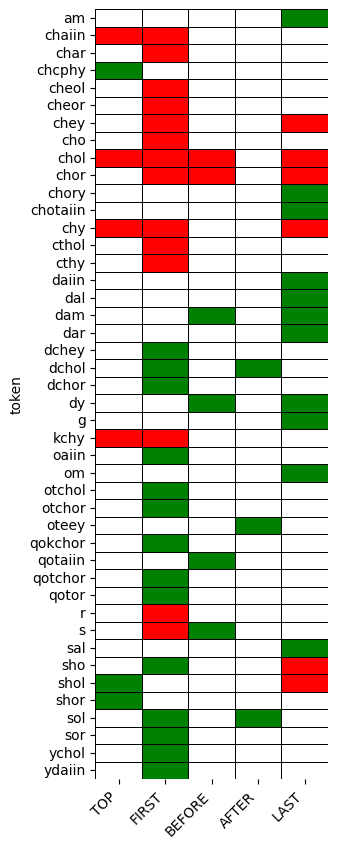

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_custom_heatmap(df):
    # Set the 'token' column as the index
    df = df.set_index('token')
    
    # Define a custom colormap: red for -1, white for 0, green for 1
    cmap = ListedColormap(['red', 'white', 'green'])
    bounds = [-1, 0, 1, 2]  # Define boundaries for color mapping
    norm = plt.cm.colors.BoundaryNorm(bounds, cmap.N)

    # Set a larger figure size to accommodate all rows
    plt.figure(figsize=(3, 10))  # You might need to adjust these dimensions based on your specific dataset
    
    # Create a heatmap using seaborn with our custom colormap and normalization
    sns.heatmap(df, annot=False, cmap=cmap, norm=norm, cbar=False, square=False,
                linewidths=0.5, linecolor='black')
    
    # Rotate x-axis labels
    plt.xticks(rotation=45, ha="right")  # Rotate labels and align right for better readability
    
    plt.show()



plot_custom_heatmap(df)

In [68]:
import pandas as pd

def html_table_to_file(df, file_name, width, height):
    # Define the color mapping based on value ranges
    def color_for_value(value):
        if value == -1:
            return 'red'
        elif value == 0:
            return 'white'
        elif value == 1:
            return 'green'
        else:
            return 'white'  # Default color

        # Determine the max width needed based on the longest column header name
    # Assuming approximately 1em per character for default font settings
    max_header_length = max(len(str(col)) for col in df.columns)
    column_width = max_header_length -1.5  # Adding some extra space for padding

    # Start the HTML document
    html = '<!DOCTYPE html>\n<html>\n<head>\n'
    html += f'<style>table, th, td {{border: 1px solid black; border-collapse: collapse;}} th, td {{padding: 0px; text-align: center;}} th:not(:first-child), td:not(:first-child) {{min-width: {column_width}em; max-width: {column_width}em;}}</style>\n'
    
    html += """<style> 
        .legend-item {
            display: flex;
            align-items: center;
            margin-bottom: 5px;
        }

        .legend-color {
            width: 20px;
            height: 20px;
            margin-right: 10px;
        }

        .legend-label {
            font-size: 16px;
        }
    </style>"""
    
    html += '</head>\n<body>\n<h1>High Propensity Tokens by Position</h1>'

    html += """    
    <div class='legend'>
        <div class='legend-item'>
            <div class='legend-color' style='background-color: green;'></div>
            <div class='legend-label'>Affinitive Propensity</div>
        </div>
        <div class='legend-item'>
            <div class='legend-color' style='background-color: red;'></div>
            <div class='legend-label'>Aversive Propensity</div>
        </div>
    </div>
   """
    
    
    
    # Start the HTML table, including headers at the top
    html += '<table><tr><th></th>'
    for col in df.columns:
        html += f'<th>{col}</th>'
    html += '</tr>'
    
    # Populate the table rows
    for index, row in df.iterrows():
        voynichese_value = display_voynichese(text=index, render=False)
        html += f'<tr><th>{voynichese_value}</th>'
        for col in df.columns:
            color = color_for_value(row[col])
            html += f'<td style="background-color:{color}">&nbsp;</td>'
        html += '</tr>'
    
    # Add headers at the bottom
    html += '<tr><th></th>'
    for col in df.columns:
        html += f'<th>{col}</th>'
    html += '</tr></table>\n'
    
    # End the HTML document
    html += '</body>\n</html>'
    
    if file_name:
        current_dir = os.getcwd()
        print(f"current_dir = {current_dir}")
        html_filename = file_name + '.html'
        absolute_html_file_path = os.path.join(current_dir, html_filename)
        png_filename = file_name + '.png'
        absolute_png_file_path = os.path.join(current_dir, png_filename)
        with open(html_filename, 'w') as file:
            file.write(html)
            print(f"Wrote {html_filename}")
        print(f"absolute_html_file_path = {absolute_html_file_path}")
        render_html_to_image(absolute_html_file_path, absolute_png_file_path, width=width, height=height+129, crop=False)

# Convert the DataFrame to an HTML file
file_name= 'voynich_data/outputs/CUTOFF_T_Propensity_Token'
html_table_to_file(df.set_index('token'), file_name, width=630, height=4000)
print(f"HTML table written to {filename}")



current_dir = /Users/andrew/GITHUB/Z01-SOM_Histocrypt_24
Wrote voynich_data/outputs/T_Propensity_Token.html
absolute_html_file_path = /Users/andrew/GITHUB/Z01-SOM_Histocrypt_24/voynich_data/outputs/T_Propensity_Token.html
Visible Content Height: 1402
Total Document Width: 614
Total Document Height: 1402
HTML table written to voynich_data/outputs/T_Propensity_Token.html


## histogram of leading Morphexnes

In [60]:
import matplotlib.pyplot as plt

def plot_two_letter_combination_histogram(tokens, n, ntop, dir):
    names = {2: 'Two', 3:'Three', 4:'Four', 5:'Five'}
    # Extract and count leading n-letter combinations
    combination_count = {}
    for token in tokens:
        if len(token) > n:
            if dir=='Lead':
                combination = token[:n].lower() # Consider the combination in lowercase to avoid case-sensitive counting
            elif dir == 'Trail':
                combination = token[-n:].lower() # Consider the combination in lowercase to avoid case-sensitive counting
                
            if combination in combination_count:
                combination_count[combination] += 1
            else:
                combination_count[combination] = 1

    # Prepare data for plotting
    combinations = list(combination_count.keys())
    counts = list(combination_count.values())

    # Sort the combinations by count
    sorted_indices = sorted(range(len(counts)), key=lambda i: counts[i], reverse=True)
    sorted_combinations = [combinations[i] for i in sorted_indices]
    sorted_counts = [counts[i] for i in sorted_indices]
    a = zip(sorted_combinations, sorted_counts)
    # print([x for x in a])

    # Plotting
    plt.figure(figsize=(10, 8))
    plt.barh(sorted_combinations[:ntop], sorted_counts[:ntop], color='skyblue')
    plt.xlabel('Frequency')
    plt.ylabel(f'{names[n]}-letter Combination')
    plt.title(f'Histogram of {dir}ing {names[n]}-letter Combinations')
    plt.gca().invert_yaxis()  # To display the bar with the highest count at the top
    plt.show()

# Example usage




In [72]:
(set(''.join(tokens)))

{"'",
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ';',
 '@',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'y',
 'z',
 '{',
 '}'}

In [55]:
tokens = corpus_by_c['ALL'].tokens()

In [2]:
plot_two_letter_combination_histogram(tokens, 4, 20, dir='Trail')

NameError: name 'plot_two_letter_combination_histogram' is not defined

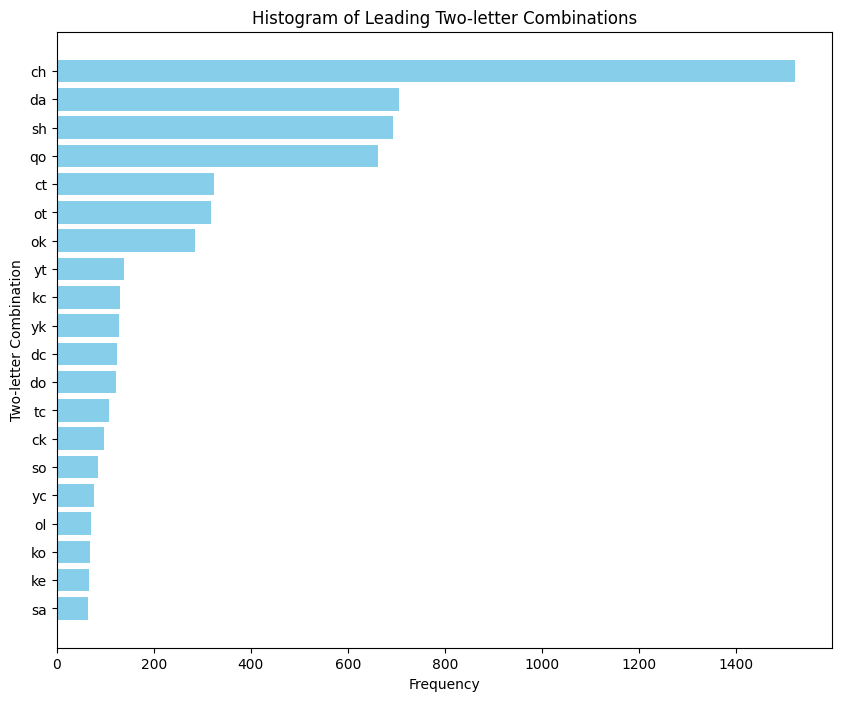

In [62]:
plot_two_letter_combination_histogram(tokens, 2, 20, dir='Lead')

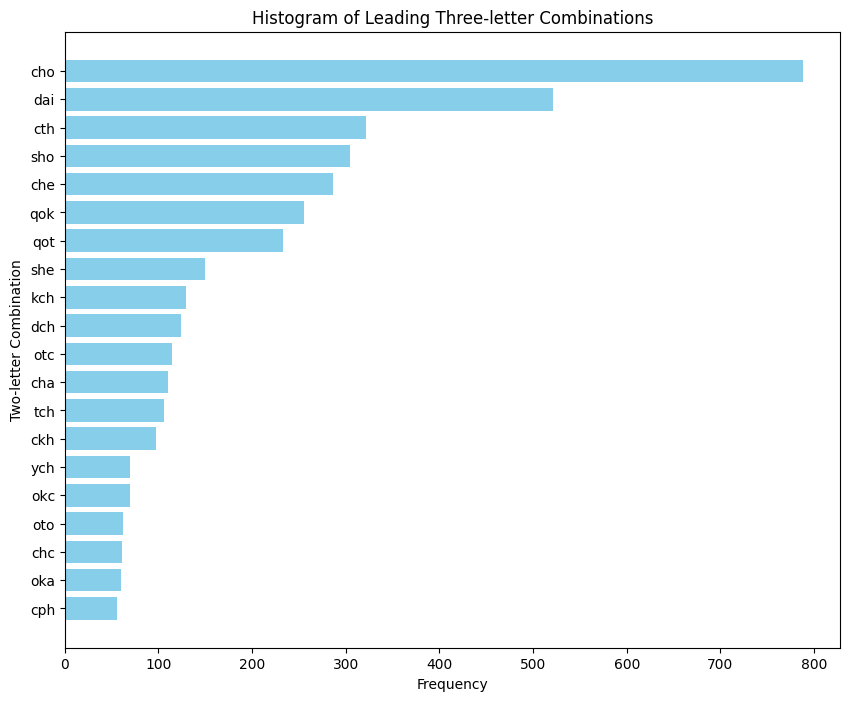

In [65]:
plot_two_letter_combination_histogram(tokens, 3, 20, dir='Lead')

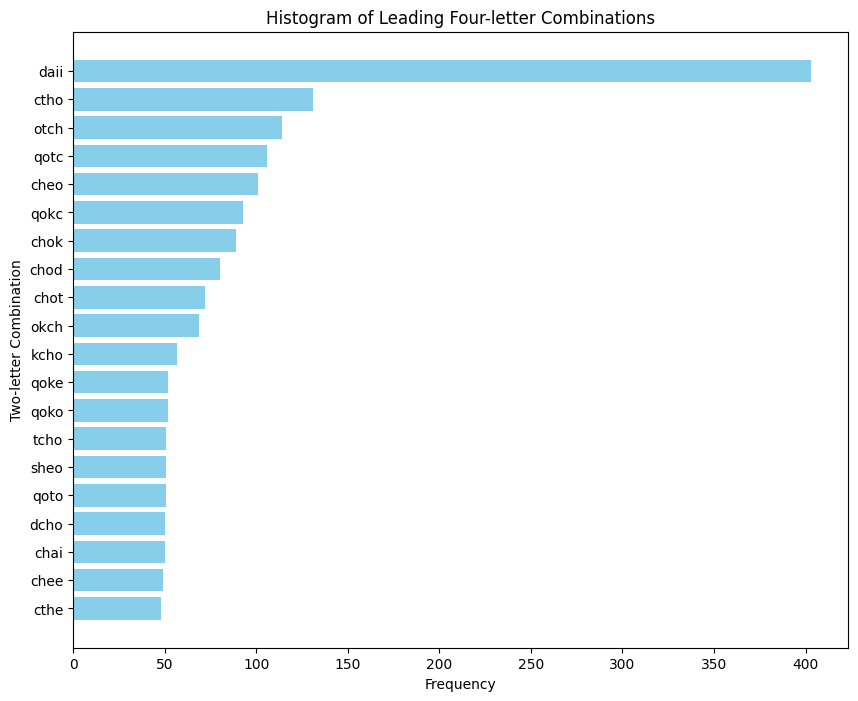

In [66]:
plot_two_letter_combination_histogram(tokens, 4, 20, dir='Lead')

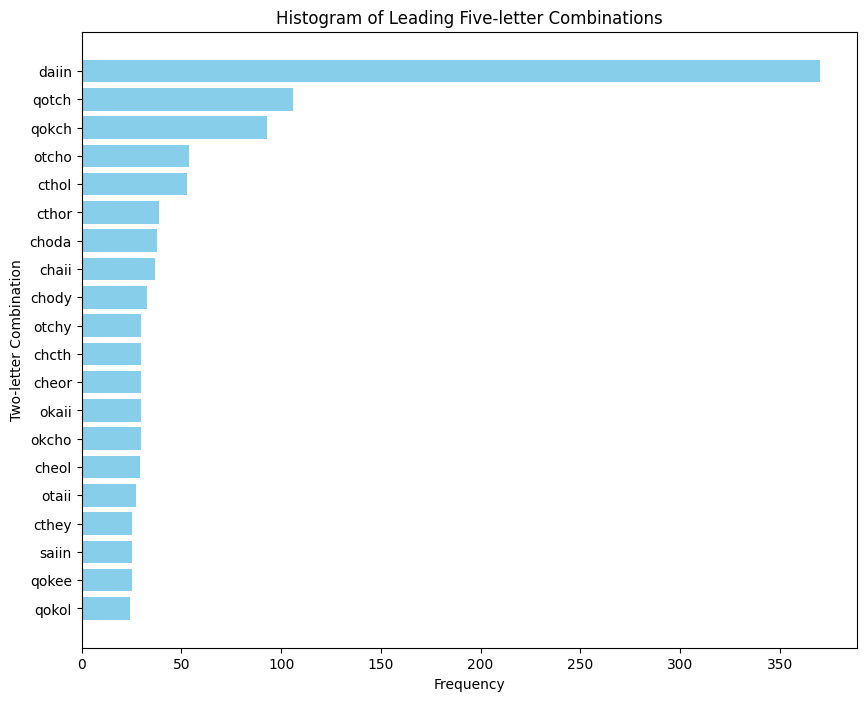

In [38]:
plot_two_letter_combination_histogram(tokens, 5, 20)

## Glyph Propensities

In [1]:
def compile_glyph_propensity_df(target_cohort, reference_cohort, p_value_threshold, bayes_threshold):
    top_token_length_dict = get_top_vocabulary_tokens_lengths_dict(reference_cohort)
    df = pd.DataFrame(columns = ['glyph',  'N_ref', 'n_ref', 'N_x', 'n_x', 'p_ref', 'p_x',  'p_value', 'sig_p_value', 'sig_BF', 'propensity', 'bayes', 'binom_stat_le', 'binom_stat_gt'])
    glyphs = set(glyphs_by_c['ALL'])
    
    for glyph in glyphs:
        pmf_ref = glyph_pmfs_by_c[reference_cohort]
        N_ref = pmf_ref.total_count
        n_ref = pmf_ref.count(glyph) if N_ref > 0 else 0
        p_ref = pmf_ref.prob(glyph, smooth=smooth)
        if p_ref == 0:
            continue

        pmf_x = glyph_pmfs_by_c[target_cohort]                        
        N_x = pmf_x.total_count
        n_x = pmf_x.count(glyph)  if N_x > 0 else 0
        p_x = pmf_x.prob(glyph, smooth=smooth)
        
        p_value = calculate_binomial_probability(n_x, N_x, p_ref)

        if n_x == 0:
            bayes_factor = 1/MAX_BAYES
        else:
            bayes_factor = bayes_factor_binomial(n_x, N_x, p_x, p_ref)
            bayes_factor = min(MAX_BAYES, bayes_factor)
        bayes_factor = int(bayes_factor)
        binom_stat_le =  binom.cdf(n_x, N_x, p_ref)        
        binom_stat_gt =  binom.cdf(n_x, N_x, 1. -p_ref)        

        if p_x ==  0.:
            propensity = -MAX_PROPENSITY
        else:
            propensity = p_x/p_ref  if p_ref > 0 else MAX_PROPENSITY
        pass        
            
        verdict_p_value = p_value <= p_value_threshold
        verdict_bayes_factor = bayes_factor >= bayes_threshold

        df.loc[len(df)] = [glyph,
                           N_ref,
                           n_ref,
                           N_x,
                           n_x,
                           p_ref,
                           p_x,
                           p_value,
                           verdict_p_value,
                           verdict_bayes_factor,
                           np.round(propensity,1),
                           bayes_factor,
                          binom_stat_le,
                          binom_stat_gt]
        pass
    df.set_index('glyph', inplace=True)
    pass
    return df